# Projekt - Rachunek prawdopodobieństwa i statystyka
## Analiza rekordów Listy Przebojów Trójki z lat 1982-2020
### Autor: Paweł Kruczkiewicz
#### Data analizy: XX.01.2021

W niniejszej pracy pragnę przyjrzeć się jednej z najbardziej znanych i z pewnością najstarszej liście przebojów w Polsce, tj. Liście Przebojów Trójki. Lista tworzona w Programie Trzecim Polskiego Radia, której pomysłodawcą i głównym prowadzącym i twórcą był Marek Niedźwiecki, przez lata kształtowała gusta muzyczne młodych pokoleń polskich słuchaczy.<br>
Niestety w roku 2020, po tzw. "Aferze w radiowej Trójce" (https://pl.wikipedia.org/wiki/Polskie_Radio_Program_III#Sprawa_pojawienia_si%C4%99_piosenki_%E2%80%9ETw%C3%B3j_b%C3%B3l_jest_lepszy_ni%C5%BC_m%C3%B3j%E2%80%9D_na_Li%C5%9Bcie_Przeboj%C3%B3w), której przyczynkiem było jedno (jak się miało okazać - ostatnie) - notowanie nr 1998, Lista Przebojów Radiowej Trójki została "zawieszona".

Jako wyraz uznania wieloletniej pracy redaktorów Trójki jak i przejaw zwykłej ciekawości na to, jak wygladały gusta "Trójkowiczów" przez wszystkie te lata, chciałbym krótko przeanalizować niemal 2 tysiące notowań

### Krótko o danych
Dane zostały pobrane ze strony https://www.lp3.pl/, skąd zostały "zeskrapowane" z użyciem języka python z pomocą modułu BeautifulSoup4. Pełny kod (wraz z plikiem "requirements.txt") dostępny jest pod podanym linkiem na githubie: https://github.com/pkrucz00/trojkaStats w pliku `lp3WebScratch`. Zapisuje on dane do pliku CSV, który to został zaimportowany za pomocą aplikacji SQLiteStudio do bazy `listaPrzebojowTrojki.db`

Baza danych składa się z jednej tabeli zawierającej wszystkie rekordy w podanym formacie:

| Nazwa kolumny | Typ Danych | Opis |
| --- | --- | --- |
| Nr notowania | INTEGER | Numer notowania (w przypadku notowań podwójnych, dla uproszczenia numerem notowania jest numer wcześniejszy (np. 665/667 -> 665)) |
| Rok notowania | INTEGER | Rok, w którym odbyło się notowanie |
| Pozycja | INTEGER | Pozycja, jaką osiągnął dany utwór  |
| Tytuł | STRING | Tytuł utworu |
| Artysta | STRING | Wykonawca utworu |
| Punkty | INTEGER | Punkty, które dostaje utwór za swoją pozycję (ze wzoru 30 - nr pozycji + 1) |

Tabela zawiera 58815 pozycji piosenek. Ponieważ liczba utworów w głównym zestawieniu zmieniała się w różnych latach, postanowiłem ujednolicić (oczyścić) dane - do bazy trafiają zawsze te utwory, które zajęły w notowaniu pozycję 30. lub wyższą. Dzięki temu przyporządkowanie punktów jest jednolite (jednak nieco różni się od stosowanego przez Radiową Trójkę systemu - np. podsumowaniach rocznych).

W bazie znajduje się 58815 rekordów. Liczba nie jest podzielna przez 30, ponieważ na listę często trafiały miejsca *ex aequo* 

Kontrowersyjne notowanie 1998 zostało tutaj zamieszczone zgodnie z tym, jak zostało wyemitowane. Nie wzięto pod uwagę notowania 1999

### Podłączenie bazy do języka R

In [1]:
#Zainstaluj paczkę "RSQLite" pozwalającą na użycie bazy danych w postaci obiektu w języku R
#NIE uruchamiaj tej komórki, jeżeli już zainstalowałeś tę paczkę
install.packages("RSQLite")
install.packages("tidyverse")

package 'RSQLite' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pawel\AppData\Local\Temp\RtmpicHZN5\downloaded_packages
package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pawel\AppData\Local\Temp\RtmpicHZN5\downloaded_packages


#### Potrzebne biblioteki

In [156]:
library(RSQLite)
library(tidyverse)

#### Wypisanie fragmentu bazy danych

In [157]:
con <- dbConnect(RSQLite::SQLite(), dbname="ListaPrzebojowTrojki.db")

dbListTables(con)

#Błąd związany z "mixed type" związany jest z tytułami i artystami,
#którzy zawierają w swojej nazwie liczby (np. '51' zespołu TSA)
records <- dbReadTable(con, "Records")
records

dbDisconnect(con)

[1] "Records"

Nr.notowania,Rok.notowania,Pozycja,Tytuł,Artysta,Punkty
1,1982,1,I'll Find My Way Home,Jon & Vangelis,30
1,1982,2,O! Nie rób tyle hałasu,Maanam,29
1,1982,3,For Those About to Rock (We Salute You),AC/DC,28
1,1982,4,51,TSA,27
1,1982,5,Opanuj się,Perfect,26
1,1982,6,The Visitors (Crackin' Up),ABBA,25
1,1982,7,Flying Colours,Jethro Tull,24
1,1982,8,Pepe wróć,Perfect,23
1,1982,9,Teraz rób co chcesz,Budka Suflera,22
1,1982,10,Słodka jest noc,Kombi,21


## Analiza wstępna/eksploracyjna
Na sam początek możemy sprawdzić, czy zebrane dane są poprawne. Sprawdźmy liczbę, medianę i średnią wszystkich rekordów

In [158]:
records %>% 
summarise(
    liczba.rekordów = n(),
    mediana = median(Punkty),
    średnia = mean(Punkty))

liczba.rekordów,mediana,średnia
58815,15,15.49499


Jak widać, mediana zbioru to 15, średnia jest bardzo bliska wartości oczekiwanej. Delikatna różnica spowodowana jest wspomnianymi wcześniej miejscami ex aequo.
A jak takie statystyki wyglądają dla pojedynczego utworu?

In [159]:
records %>%
    transmute(
        Piosenka = paste(Tytuł, Artysta, sep=" - "),
        Punkty=Punkty
    ) %>%
    group_by(Piosenka)%>%
    summarize(
        sumaPunktów = sum(Punkty),
        liczbaWystapien = n()
    )%>%
    summarize(
        śr.tyg.na.liscie = mean(liczbaWystapien),
        med.tyg.na.liscie = median(liczbaWystapien),
        śr.suma.punktów = mean(sumaPunktów),
        med.sumy.punktow = median(sumaPunktów)
    )

`summarise()` ungrouping output (override with `.groups` argument)


śr.tyg.na.liscie,med.tyg.na.liscie,śr.suma.punktów,med.sumy.punktow
9.448193,8,146.3997,86


Nawet tak prosty test jak wyżej przyniósł ciekawe wyniki! Średnia jest oddalona od mediany, co w statystyce oznacza, że zbiór jest skrzywiony w stronę mniejszych wartości. Narysujmy zatem oba histogramy - liczby tygodni w zestawieniu oraz sumy zdobytych punktów

`summarise()` ungrouping output (override with `.groups` argument)


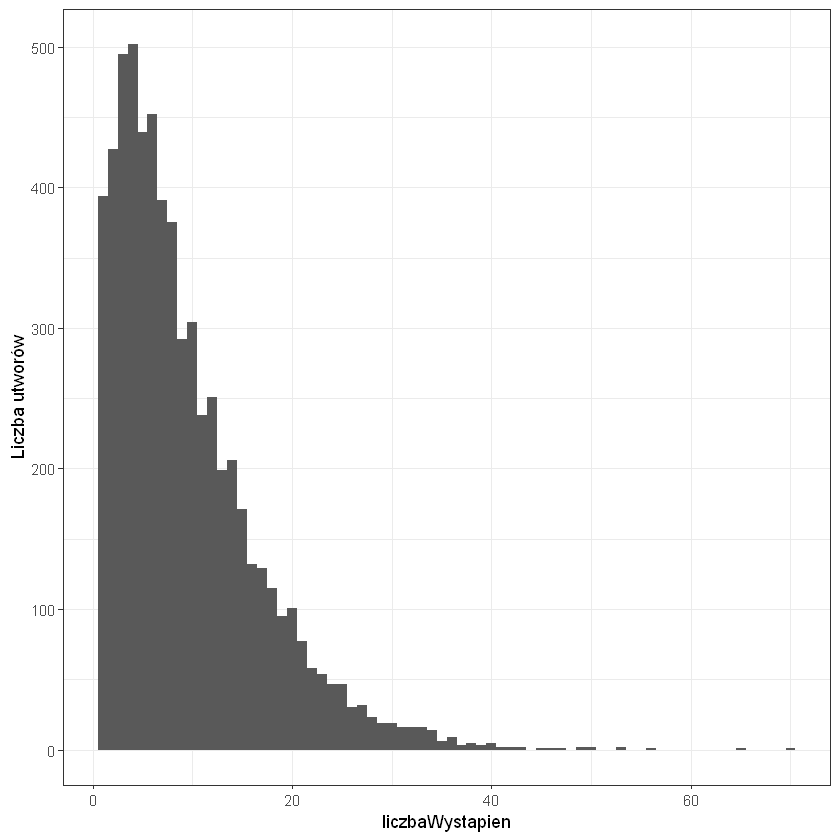

In [237]:
records %>%
    transmute(
        Piosenka = paste(Tytuł, Artysta, sep=" - "),
        Punkty=Punkty
    ) %>%
    group_by(Piosenka)%>%
    summarize(
        liczbaWystapien = n(),
        )%>%
    ggplot() +
    theme_bw()+
    geom_bar(aes(x=liczbaWystapien), stat="bin", binwidth=1) + ylab("Liczba utworów")


`summarise()` ungrouping output (override with `.groups` argument)


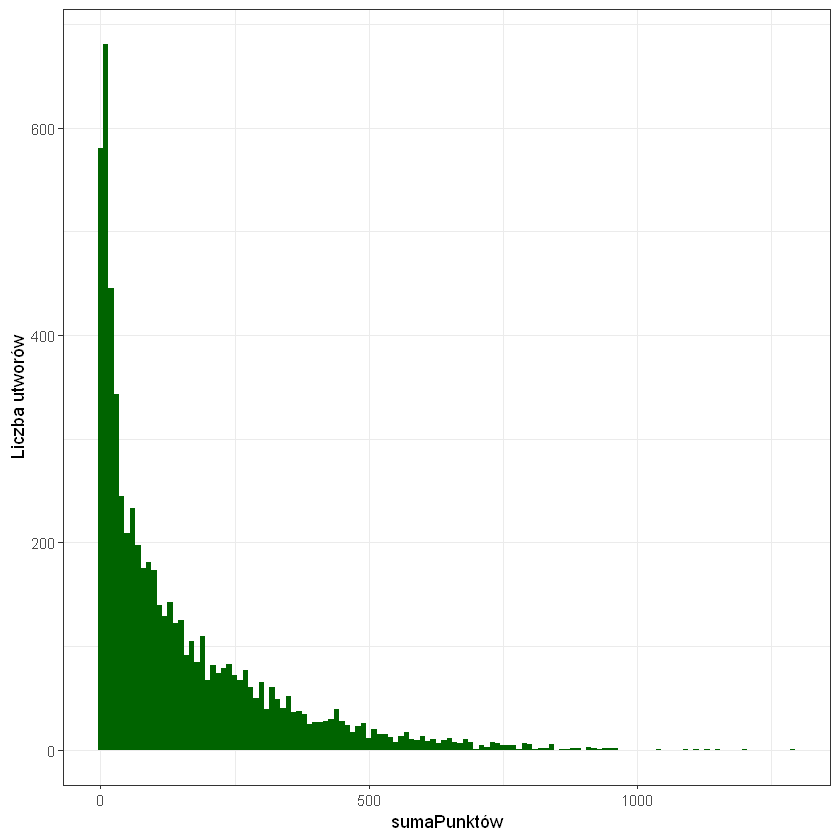

In [236]:
records %>%
    transmute(
        Piosenka = paste(Tytuł, Artysta, sep=" - "),
        Punkty=Punkty
    ) %>%
    group_by(Piosenka)%>%
    summarize(
        sumaPunktów = sum(Punkty),
        )%>%
    ggplot() +
    theme_bw()+
    geom_bar(aes(x=sumaPunktów), stat="bin", binwidth=10, fill='darkgreen') + ylab("Liczba utworów")

Teraz od razu widać prostą zależność - zdecydowana większość utworów znajduje się w zestawieniu zajmuje niskie pozycje, uzyskując w ten sposób niską sumaryczną punktację. Niewielka liczba utworów przełamuje barierę 500 punktów, jeszcze mniej 1000. Sprawdźmy zatem, jak wygląda ów "top" utworów.

Poniżej zestawiono 20 utworów o największej sumarycznej liczbie punktów

`summarise()` ungrouping output (override with `.groups` argument)


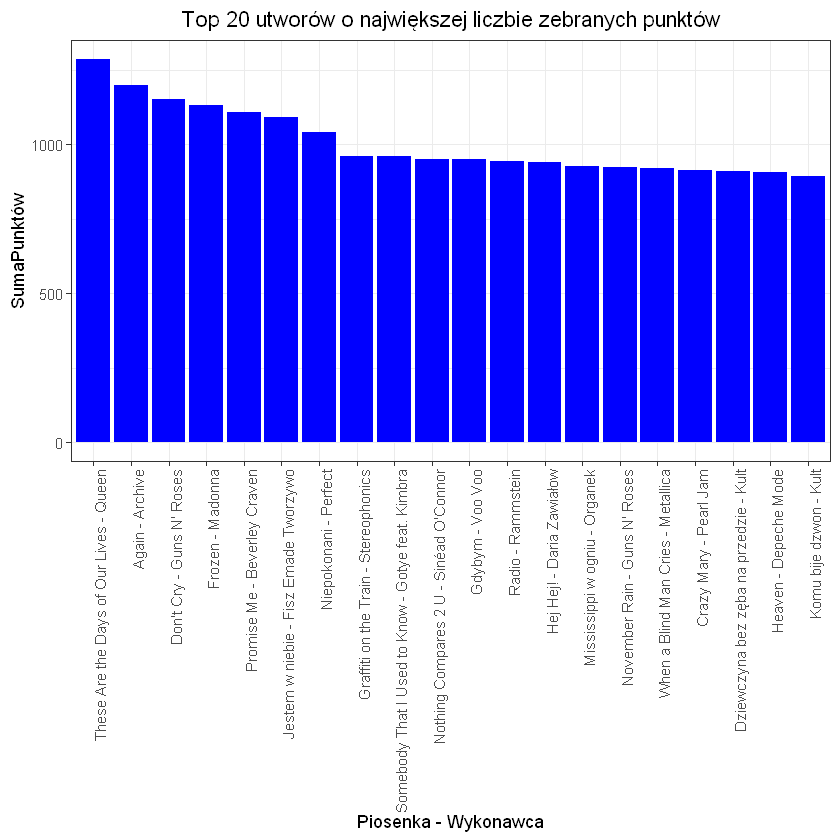

In [235]:
records %>%
    transmute(
        Piosenka = paste(Tytuł, Artysta, sep=" - "),
        Punkty=Punkty
    )%>%
    group_by(Piosenka) %>%
    summarise(
          SumaPunktów = sum(Punkty)
          ) %>%
    top_n(20, SumaPunktów) %>%
    
    ggplot() +
    geom_bar(aes(x = reorder(Piosenka, -SumaPunktów), y = SumaPunktów), stat="identity", fill='blue')+
    theme_bw()+
    theme(axis.text.x = element_text(angle=90, hjust=1), plot.title = element_text(hjust = 0.5)) +
    xlab("Piosenka - Wykonawca")+
    ggtitle("Top 20 utworów o największej liczbie zebranych punktów")

Sprawdźmy również, ile dokładnie utworów przekroczyło bariery okrągłej liczby punktów

In [169]:
tableWithPoints <-    
    records %>% 
    transmute(
        Piosenka = paste(Tytuł, Artysta, sep=" - "),
        Punkty=Punkty
    )%>%
    group_by(Piosenka) %>%
    summarise(SumaPunktów = sum(Punkty))

numberOfSongs <-
    records %>%
    transmute(Piosenka = paste(Tytuł, Artysta, sep=" - "))%>%
    distinct() %>%
    summarise(liczbaPiosenek = n())


progi = seq(0, 1000, by=100)
liczbaPiosenekPowyzejProgu = c()
procent = c()
res <- data.frame()
for (Próg in progi){
    
    tmp <-
        tableWithPoints %>%
        filter(SumaPunktów > Próg) %>%
        summarize(Liczba.Piosenek = n())
    pr <- round(tmp*100/numberOfSongs, 2)
    newRow <- cbind(Próg, tmp, pr)
    res <- rbind(res, newRow)
}
names(res)[3] <- "Procent"
res

`summarise()` ungrouping output (override with `.groups` argument)


Próg,Liczba.Piosenek,Procent
0,6225,100.00
100,2844,45.69
200,1677,26.94
300,972,15.61
400,548,8.80
500,291,4.67
600,159,2.55
700,79,1.27
800,38,0.61
900,19,0.31


Podobny jak wyżej histogram można również stworzyć dla liczby punktów zdobytych przez danego artystę

`summarise()` ungrouping output (override with `.groups` argument)


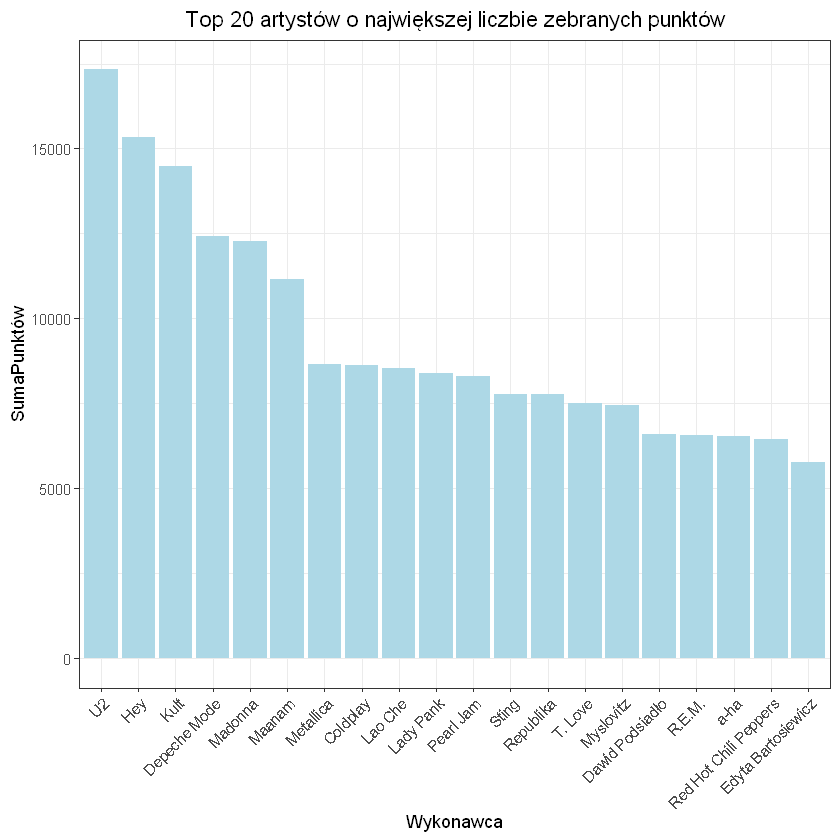

In [234]:
records %>%
    select(Artysta, Punkty) %>%
    group_by(Artysta) %>%
    summarise(
        SumaPunktów = sum(Punkty)
        )%>%
    top_n(20, SumaPunktów) %>%
    
    ggplot() +
    geom_bar(aes(x = reorder(Artysta, -SumaPunktów), y = SumaPunktów), stat="identity", fill='lightblue')+
    theme_bw()+
    theme(axis.text.x = element_text(angle=45, hjust=1), plot.title = element_text(hjust = 0.5)) +
    xlab("Wykonawca")+
    ggtitle("Top 20 artystów o największej liczbie zebranych punktów")
    

Jak suma punktów rozkładała się dla podanych wyżej twórców w ciągu kolejnych notowań?

`summarise()` ungrouping output (override with `.groups` argument)


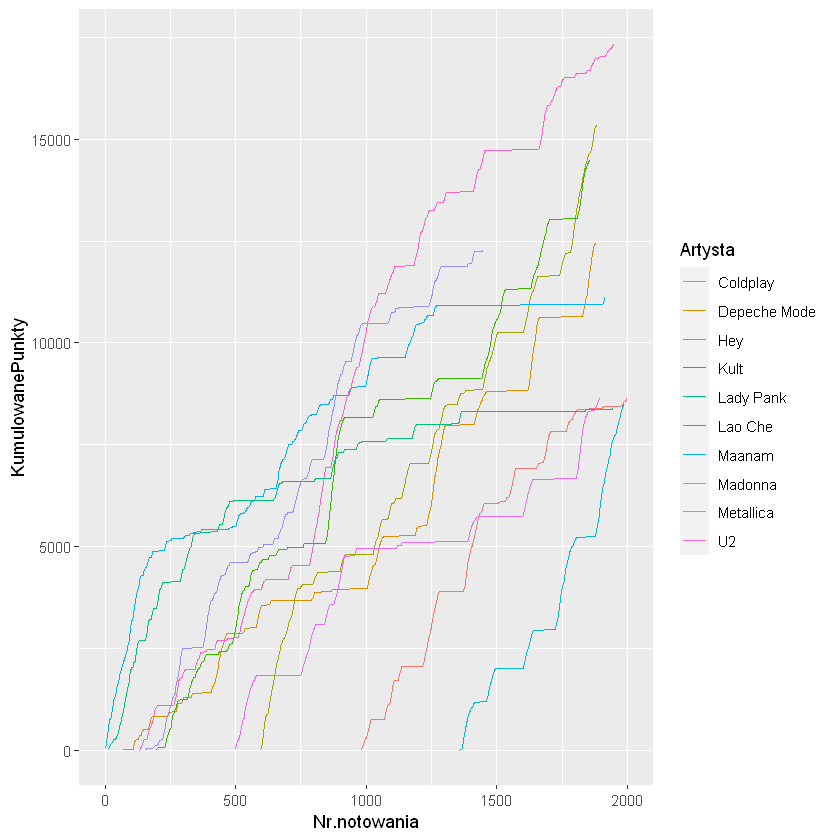

In [171]:
topArtystow <-
    records %>%
    select(Artysta, Punkty) %>%
    group_by(Artysta) %>%
    summarise(
        SumaPunktów = sum(Punkty)
        )%>%
    top_n(10, SumaPunktów)

najlepsiArtysci <- topArtystow$Artysta

records %>%
filter(Artysta %in% najlepsiArtysci) %>%
group_by(Artysta) %>%
mutate(KumulowanePunkty=cumsum(Punkty)) %>%
select(Nr.notowania, Artysta, KumulowanePunkty) %>%
ggplot() +
geom_line(aes(Nr.notowania, KumulowanePunkty, color=Artysta))

Powyższy wykres pokazuje nam o wiele dokładniejsze dane niż sam histogram. Teraz widać wyraźnie, że artyści tacy jak Maanam czy Lady Pank "zapewnili" sobie najwyższe miejsca już w pierwszych notowaniach, natomiast nowsze zespoły, takie jak np. Lao Che wspinały się dynamicznie w ciągu ostatnich kilkunastu notowań.

Również "skoki" wskazują na dużą liczbę punktów zdobywanych w którkim czasie, tzw. "hitów". Jakie one były dla poszczgólnych artystów?

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` regrouping output by 'Artysta' (override with `.groups` argument)


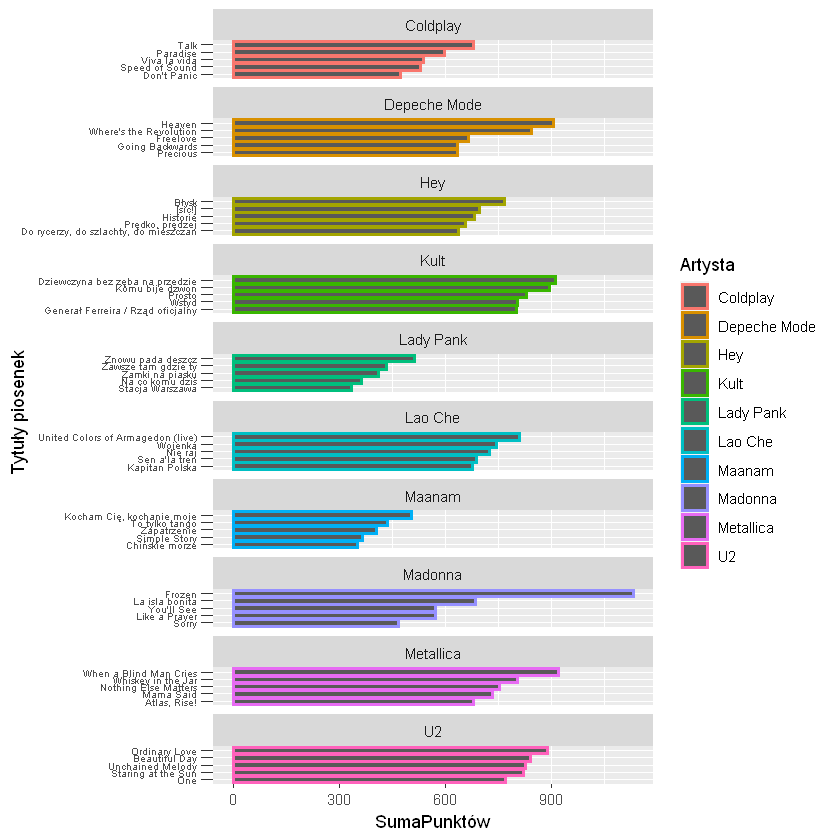

In [265]:
topArtystow <-
    records %>%
    select(Artysta, Punkty) %>%
    group_by(Artysta) %>%
    summarise(
        SumaPunktów = sum(Punkty)
        )%>%
    top_n(10, SumaPunktów)

najlepsiArtysci <- topArtystow$Artysta

records %>%
filter(Artysta %in% najlepsiArtysci) %>%
group_by(Artysta, Tytuł) %>%
summarise(
    SumaPunktów = sum(Punkty)
    ) %>%
ungroup() %>%
group_by(Artysta) %>%
arrange(desc(SumaPunktów)) %>%
top_n(5, SumaPunktów) %>%
#arrange(Artysta)%>%
ggplot() +
geom_bar(aes(x = reorder(Tytuł, SumaPunktów), SumaPunktów, color=Artysta), stat="identity", size=0.9)+
theme(axis.ticks.length.y=unit(0.25, "cm"), axis.text.y = element_text(size=6, hjust=1))+
facet_wrap(~Artysta, scales="free_y", ncol=1)+ coord_flip() +
xlab("Tytuły piosenek")

## Badanie hipotez
### 1. *Mnie się podobają melodie, które już raz słyszałem*, czyli Czy znane nazwiska artystów zapewniają wyższe pozycje?
Aby znaleźć (przybliżoną) odpowiedź na powyższe pytanie, można sprawdzić, czy istnieje korelacja między liczbą piosenek w zestawieniu danego artysty, a liczbą punktów na dany utwór 

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` regrouping output by 'Artysta' (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`geom_smooth()` using formula 'y ~ x'


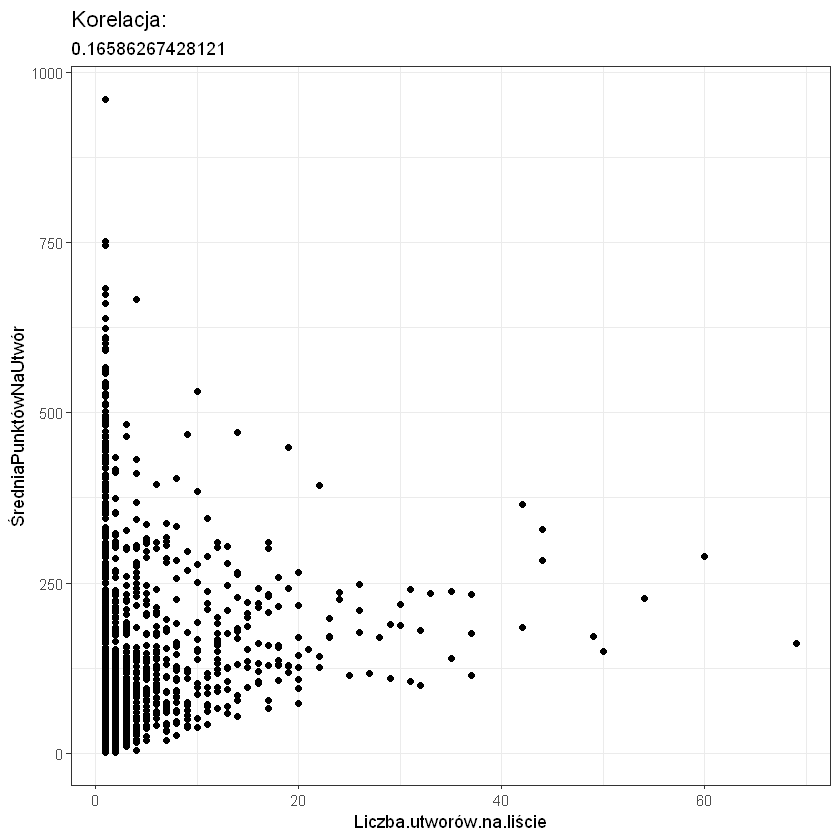

In [257]:
#Artyści wg liczby piosenek w liście
liczbaPiosenekNaArtyste <- 
    records %>%
    select(Tytuł, Artysta) %>%
    distinct() %>%
    group_by(Artysta) %>%
    summarise(Liczba.utworów.na.liście = n()) %>%
    arrange(desc(Liczba.utworów.na.liście)) %>%
    ungroup()

#Średnia punktów na utwór
śrPktNaArtyste <- records %>%
    select(Artysta, Tytuł, Punkty) %>%
    group_by(Artysta, Tytuł) %>%
    summarise(
        SumaPunktów = sum(Punkty),   #sumaryczna liczba punktów dla każdego utworu
        ) %>%
    ungroup() %>%
    group_by(Artysta) %>%
    summarise(
        ŚredniaPunktówNaUtwór = mean(SumaPunktów)
    ) %>% arrange(desc(ŚredniaPunktówNaUtwór))%>%
    ungroup()

joinedTable <- left_join(liczbaPiosenekNaArtyste, śrPktNaArtyste, by="Artysta")
korelacja <- cor(joinedTable$Liczba.utworów.na.liście, joinedTable$ŚredniaPunktówNaUtwór)

left_join(liczbaPiosenekNaArtyste, śrPktNaArtyste, by="Artysta") %>%
    #top_n(20, Liczba.utworów.na.liście) %>%
    ggplot(aes(x = Liczba.utworów.na.liście, y=ŚredniaPunktówNaUtwór)) +
    geom_point() +
    stat_smooth(method = "lm_robust") +  #poszukiwanie regresji liniowej
    theme_bw() +
    ggtitle("Korelacja:" , korelacja)

Jak widać na powyższym wykresie, korelacja jest mała. Zależność okazała się na tyle mała, że język R nie znalazł żadnej linii metodą najmniejszych kwadratów.
Osobiście uważam, że niski współczynnik korelacji to dobry znak - znani artyści nie determinują wyglądu listy w stopniu znacznym, dzięki czemu utalentowani młodzi artyści również mogą znaleźć się na liście.

Jednak przyglądając się szczytom powyższych tabel, zauważyłem pewien szczegół:

In [269]:
śrPktNaArtyste %>% top_n(20, ŚredniaPunktówNaUtwór)

Artysta,ŚredniaPunktówNaUtwór
Gotye feat. Kimbra,960.00
Fisz Emade Tworzywo feat. Justyna Święs,752.00
Zbigniew Zamachowski i Grupa MoCarta,746.00
"Fisz, Emade, Tworzywo feat. Kasia Nosowska",682.00
Michael Jackson feat. special guitar performance by Slash,674.00
Organek,666.75
Męskie Granie Orkiestra 2018,660.00
Kazik & Edyta Bartosiewicz,639.00
Basia Stępniak-Wilk & Grzegorz Turnau,623.00
Mira Kubasińska & After Blues,610.00


Zaobserwowałem, że początek powyższej tabeli jest stosunkowo pełen muzycznych kolaboracji, np. "Kazik & Edyta Bartosiewicz", "Gotye feat. Kimbra". Czy jest to ogólna zasada? Czy kolaboracje między artystami to klucz do sukcesu? Sprawdźmy zatem, jak wygląda to dla całej tabeli.

Dla uproszczenia przyjmiemy, że muzyczne kolaboracje mają w nazwie znak "&" bądź słowo "feat." czyli "featuring". Ważne jest, że nie jest to metoda perfekcyjna. Często nie jest to jednorazowa współpraca jak w przypadku "Nick Cave & The Bad Seeds", którzy tworzą muzykę wspólnie już przez kilka dekad. Nie wliczamy jednak np. Męskiego Grania 2018, które jest oczywiście, kolaboracją

nazwa,liczba_utworów,średnia_liczba_punktów,mediana,odchylenie_standardowe
Wszyscy artyści,1826,111.6308,73.30952,122.6950
Kolaboracje,371,137.1124,68.00000,164.3714


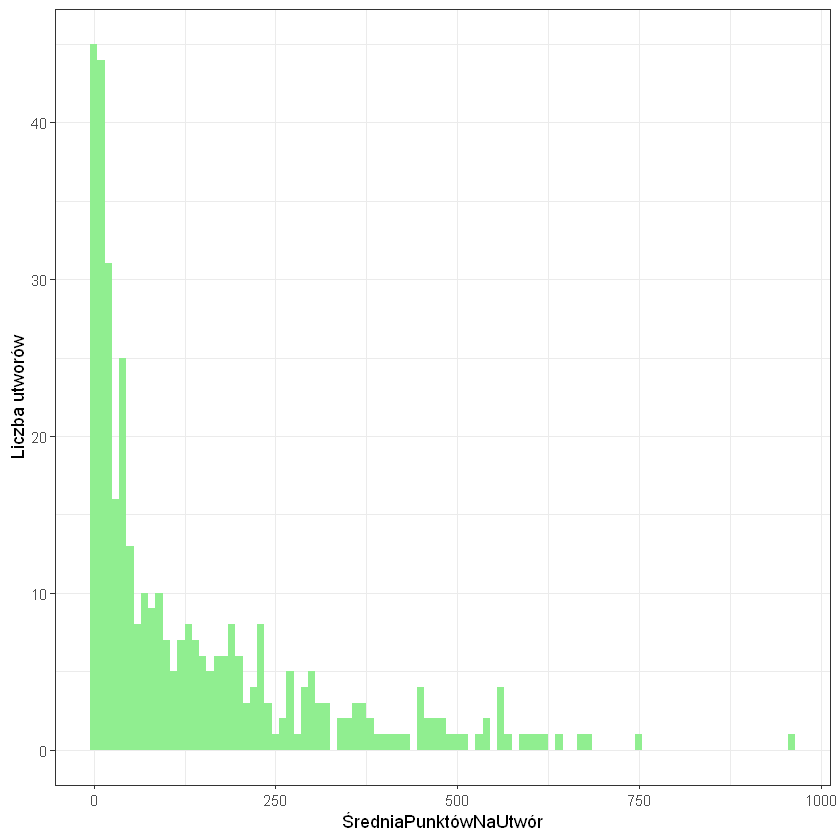

In [293]:
kolaboracjeTabela <-
    śrPktNaArtyste %>%
    filter(str_detect(Artysta, '&|feat.'))

calosciowo <-
    śrPktNaArtyste %>%
    summarise(
        nazwa = "Wszyscy artyści",
        liczba_utworów= n(),
        średnia_liczba_punktów = mean(ŚredniaPunktówNaUtwór),
        mediana = median(ŚredniaPunktówNaUtwór),
        odchylenie_standardowe = sd(ŚredniaPunktówNaUtwór)
        )

kolaboracje <-     
    kolaboracjeTabela %>%
    summarise(
        nazwa = "Kolaboracje",
        liczba_utworów = n(),
        średnia_liczba_punktów = mean(ŚredniaPunktówNaUtwór),
        mediana = median(ŚredniaPunktówNaUtwór),
        odchylenie_standardowe = sd(ŚredniaPunktówNaUtwór)
        )


rbind(calosciowo, kolaboracje)

śrPktNaArtyste %>%
filter(str_detect(Artysta, '&|feat.')) %>%
ggplot(aes(ŚredniaPunktówNaUtwór)) +
    theme_bw()+
    geom_bar( stat="bin", binwidth=10, fill='lightgreen') + ylab("Liczba utworów")

Powyższa tabelka pokazuje, że początkowa hipoteza na bazie fragmentu danych, nie była poprawna. Utwory powstałe jako muzyczne kolaboracje mają co prawda wyższą średnią sumarycznych punktów na utwór, jednak niższą medianę. Oznacza to, że w porównaniu z ogółem utworów, omawiane mogą w znaczący sposób "wyprzedzić" resztę, jednak jest to jeszcze bardziej niepewne niż w normalnym przypadku, na co wskazuje większe odchylenie standardowe.

Sprawdźmy, czy istnieje korelacja między liczbą piosenek w zestawieniu a średnią zdobytą liczbą punktów na utwór dla utworów muzycznych kolaboracji

`geom_smooth()` using formula 'y ~ x'


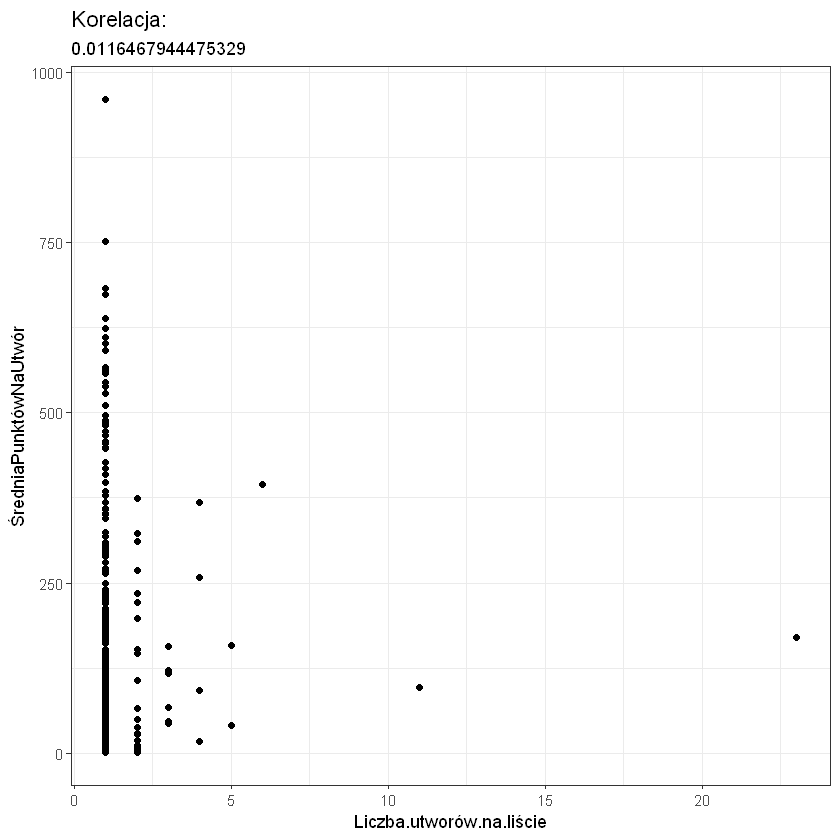

In [297]:
kolaboracjeLiczbaPiosenek <- (liczbaPiosenekNaArtyste %>% filter(str_detect(Artysta, '&|feat.')))
kolaboracjeŚrednia <- (śrPktNaArtyste %>% filter(str_detect(Artysta, '&|feat.')))                      

joinedTable <- left_join(kolaboracjeLiczbaPiosenek, kolaboracjeŚrednia, by="Artysta")
korelacja <- cor(joinedTable$Liczba.utworów.na.liście, joinedTable$ŚredniaPunktówNaUtwór)

    joinedTable %>%
    ggplot(aes(x = Liczba.utworów.na.liście, y=ŚredniaPunktówNaUtwór)) +
    geom_point() +
    stat_smooth(method = "lm_robust") +  #poszukiwanie regresji liniowej
    theme_bw() +
    ggtitle("Korelacja:" , korelacja)

Jak widać - teraz korelacja jest jeszcze mniejsza. Oczywiście można również sprawdzić, czy kolaboracje częstych "bywaczy" na liście (jak np. "Kazik & Edyta Bartosiewicz") zapewniają więcej punktów niż typowy efekt współpracy między twórcami, jednak jest to już historia na inny czas